<a href="https://colab.research.google.com/github/ramilvl/Disaster-Tweets-Classification-using-Deep-Learning-Word-Embeddings/blob/main/bigdata3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
tweet = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

In [4]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
tweet.shape

(7613, 5)

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


target class distribution

In [ ]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

In [ ]:
tweet

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


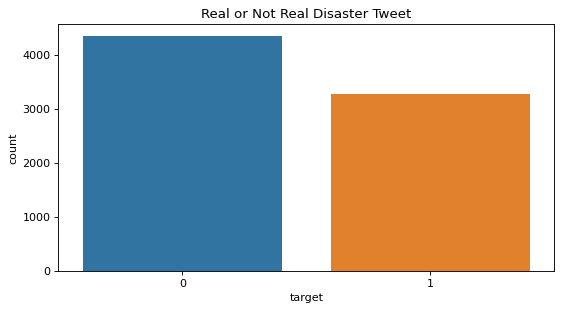

In [ ]:
sns.countplot(x='target', data=tweet)
plt.title('Real or Not Real Disaster Tweet')
plt.show()

In [ ]:
pip install seaborn matplotlib


In [ ]:
tweet['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<Axes: ylabel='target'>

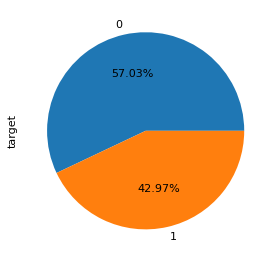

In [ ]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')

Number of Characters Distribution in Tweets

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-bg3t5ur8
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-bg3t5ur8
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=e285e6569458b6829a8e7a331c2659f94ba3590d7341368bb594e61229461351
  Stored in directory: /tmp/pip-ephem-wheel-cache-_tfzp9qv/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as kgp

In [ ]:
tweet = kgp.get_basic_features(tweet)

In [ ]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


<ipython-input-24-72f162dc66a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweet['char_counts'])


<Axes: xlabel='char_counts', ylabel='Density'>

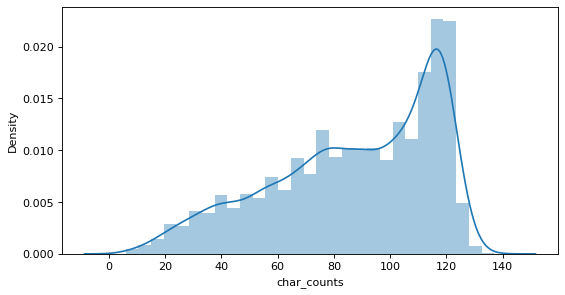

In [ ]:
sns.distplot(tweet['char_counts'])

<ipython-input-25-4c013d23f0f8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True, color='red')
<ipython-input-25-4c013d23f0f8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True, color='blue')


<Axes: xlabel='char_counts', ylabel='Density'>

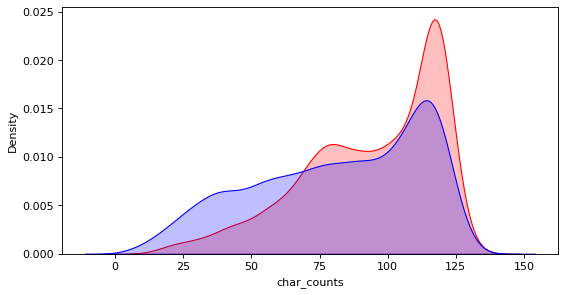

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True, color='blue')

Number of Words, Average Words Length, and Stop words Distribution in Tweets


<ipython-input-26-48b4fde55523>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True, color='red')
<ipython-input-26-48b4fde55523>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True, color='magenta')


<Axes: xlabel='word_counts', ylabel='Density'>

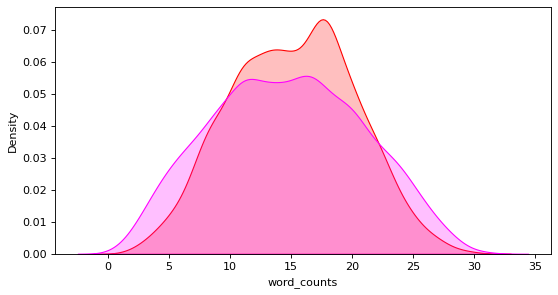

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True, color='magenta')

<ipython-input-27-a2a38ce1c6af>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True, color='red')
<ipython-input-27-a2a38ce1c6af>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True, color='black')


<Axes: xlabel='avg_wordlength', ylabel='Density'>

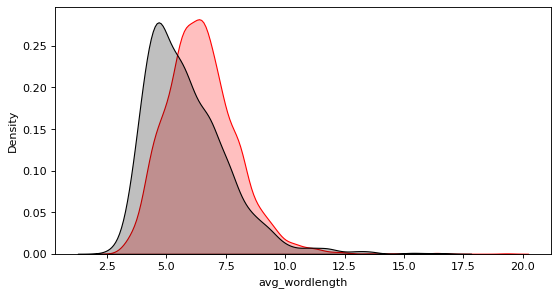

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True, color='black')

<ipython-input-29-e383e6438323>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True, color='red')
<ipython-input-29-e383e6438323>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True, color='yellow')


<Axes: xlabel='stopwords_counts', ylabel='Density'>

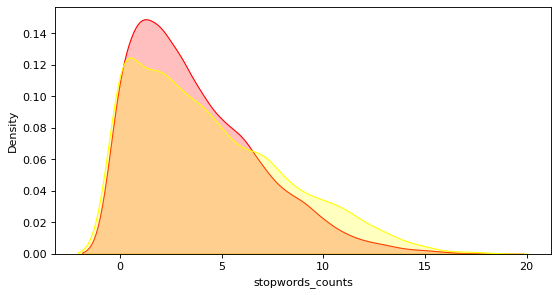

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True, color='yellow')

  Most and Least Common Words

In [ ]:
freqs = kgp.get_word_freqs(tweet, 'text')

In [ ]:
top20 = freqs[:20]

<BarContainer object of 20 artists>

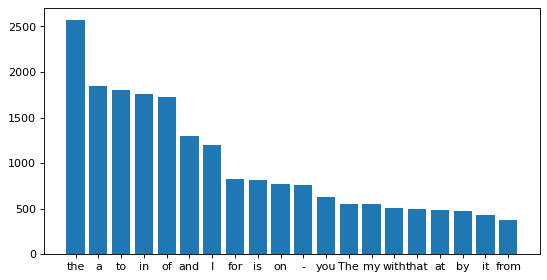

In [ ]:
plt.bar(top20.index, top20.values)

In [ ]:
least20 = freqs[-20:]
least20

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
dtype: int64

In [ ]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)

In [ ]:
bigram

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476),
 ('ûó bulletproof', 68475),
 ('ûó britain', 68474),
 ('ûó bbc', 68473),
 ('ûó and', 68472),
 ('ûó an', 68471),
 ('ûòåêcnbc http', 68470),
 ('ûòthe united', 68469),
 ('ûò800000 fatalities', 68468),
 ('ûò ûïdetonate', 68467),
 ('ûò your', 68466),
 ('ûò vladimir', 68465),
 ('ûò video', 68464),
 ('ûò usa', 68463),
 ('ûò two', 68462),
 ('ûò those', 68461),
 ('ûò the', 68460),
 ('ûò steve', 68459),
 ('ûò skyåênews', 68458),
 ('ûò residents', 68457),
 ('ûò part', 68456),
 ('ûò news', 68455),
 ('ûò musicians', 68454),
 ('ûò mo

In [ ]:
bigram[:20]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

One Shot Data Cleaning

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)
    return x

In [ ]:
tweet['text']=tweet['text'].apply(lambda x:get_clean(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [ ]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

Disaster Words Visualization with Word Cloud

In [ ]:
tweet

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,73,11,6.636364,2,0,0,2,0
7609,10870,NaN,NaN,aria ahrary thetawniest the out of control wil...,1,106,20,5.300000,9,0,2,2,0
7610,10871,NaN,NaN,m1 94 0104 coordinated universal time5km s of ...,1,58,8,7.250000,1,0,0,7,2
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1,119,19,6.263158,6,0,0,2,0


In [ ]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')

In [ ]:
real=' '.join(real.index)

In [ ]:
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

NameError: ignored

Classification with TFIDF and SVM

In [5]:
text=tweet['text']
y=tweet['target']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)


In [8]:
X.shape

(7613, 21637)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [17]:
pip install scikit-learn


In [25]:
from sklearn.metrics import classification_report

def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [26]:
from sklearn.svm import LinearSVC
clf=LinearSVC()

In [27]:
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523



In [31]:
def get_clean(text):
    cleaned_text = text.lower()
    return cleaned_text
x = 'there is fire in the forest'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

there is fire in the forest [1]


In [33]:
x = 'trump threatned with nuclear war'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

trump threatned with nuclear war [1]


In [34]:
x = 'government has recently started registration for covid-19 vaccine'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

government has recently started registration for covid-19 vaccine [0]


Classification with Word2Vec and SVM

In [37]:
!python -m spacy download en_core_web_lg

2023-12-16 23:59:38.793391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 23:59:38.793489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 23:59:38.798291: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 23:59:41.791689: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [38]:
import spacy
import en_core_web_lg

In [39]:
nlp = en_core_web_lg.load()

In [40]:
x= 'cat dog'
doc = nlp(x)

In [41]:
doc.vector.shape

(300,)

In [42]:
def get_vec(x):
  doc=nlp(x)
  vec=doc.vector
  return vec

In [43]:
tweet['vec']=tweet['text'].apply(lambda x:get_vec(x))

In [44]:
tweet.head()

,id,keyword,location,text,target,vec
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[-0.965633, 0.086769275, -2.2507236, 0.4783793..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[-1.8681643, -1.6165241, -0.21609005, -1.76522..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[-2.4070368, 0.27042598, -1.3639991, 0.7013667..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[-1.0255101, -0.15121445, -2.2331533, 1.724021..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[0.08517767, -0.10672835, -1.9185519, 0.144816..."


In [45]:
X=tweet['vec'].to_numpy()
X=X.reshape(-1, 1)

In [46]:
X

array([[array([-0.965633  ,  0.08676928, -2.2507236 ,  0.47837934,  3.5321674 ,
               -0.24730931,  0.39215264,  1.9251565 , -0.70191383, -0.64519435,
                3.4592628 , -0.9347378 , -3.5039713 ,  0.35209933,  1.0093621 ,
               -0.22834137,  1.1669065 , -0.47538564, -1.9030656 , -2.670917  ,
                1.0294721 ,  0.8854437 , -0.90391856, -0.3103571 , -1.4900671 ,
                2.0815854 , -0.9348564 ,  1.0282948 , -0.5553093 ,  0.7062209 ,
                3.4861264 , -0.31201145, -0.5068706 , -3.7067873 , -1.0895244 ,
               -1.5154927 ,  0.8162061 , -0.08782359,  3.0494664 ,  3.1482377 ,
                2.5270693 ,  4.205588  , -0.3551851 ,  2.1065407 , -2.7463    ,
                0.0984007 , -0.8032506 , -0.764263  ,  0.03628574,  0.07035708,
               -0.2512879 ,  1.8004892 , -0.1252974 , -3.284616  , -0.19222999,
                1.5633593 , -1.1453378 ,  0.48781422, -0.89051926, -0.770863  ,
                0.05353423, -1.748276  ,

In [48]:
X.shape

(7613, 1)

In [53]:
import numpy as np

X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [54]:
X.shape

(7613, 300)

In [56]:
y=tweet['target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [58]:
%%time
clf=LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       869
           1       0.81      0.67      0.73       654

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.79      1523

CPU times: user 9.51 s, sys: 57.8 ms, total: 9.57 s
Wall time: 9.72 s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Word Embeddings and Classification with Deep Learning

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D




In [61]:
token=Tokenizer()
token.fit_on_texts(text)

In [62]:
text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [63]:
vocab_size = len(token.word_index) + 1

In [64]:
vocab_size

22701

In [65]:
print(token.word_index)

{'t': 1, 'co': 2, 'http': 3, 'the': 4, 'a': 5, 'in': 6, 'to': 7, 'of': 8, 'and': 9, 'i': 10, 'is': 11, 'for': 12, 'on': 13, 'you': 14, 'my': 15, 'with': 16, 'that': 17, 'it': 18, 'at': 19, 'by': 20, 'this': 21, 'from': 22, 'https': 23, 'are': 24, 'be': 25, 'was': 26, 'have': 27, 'like': 28, 'amp': 29, 'as': 30, 'up': 31, 'me': 32, 'but': 33, 'just': 34, 'so': 35, 'not': 36, 'your': 37, 'out': 38, 'no': 39, 'all': 40, 'after': 41, 'will': 42, 'an': 43, 'has': 44, 'fire': 45, "i'm": 46, 'when': 47, 'if': 48, 'we': 49, 'get': 50, 'now': 51, 'new': 52, 'via': 53, 'more': 54, '2': 55, 'about': 56, 'or': 57, 'news': 58, 'people': 59, 'what': 60, 'they': 61, 'one': 62, 'he': 63, 'how': 64, 'been': 65, 'over': 66, 'who': 67, "it's": 68, 'into': 69, "don't": 70, 'do': 71, 'video': 72, "'": 73, 'can': 74, 'emergency': 75, 'disaster': 76, 'there': 77, 'police': 78, 'than': 79, '3': 80, 'her': 81, 'u': 82, 'would': 83, 'still': 84, 'his': 85, 'some': 86, 'were': 87, 'body': 88, 'us': 89, 'burning'

In [66]:
encoded_text=token.texts_to_sequences(text)

In [67]:
print(encoded_text)

[[119, 4633, 24, 4, 868, 8, 21, 263, 138, 1619, 4634, 89, 40], [189, 45, 229, 799, 6954, 6955, 1404], [40, 1751, 1620, 7, 6956, 6, 6957, 24, 136, 6958, 20, 1752, 39, 441, 256, 57, 2158, 6, 714, 1405, 24, 1106], [835, 2921, 59, 4635, 1500, 256, 1405, 6, 96], [34, 100, 1221, 21, 320, 22, 6959, 2159, 30, 271, 22, 1500, 6960, 69, 5, 187], [2922, 378, 96, 1501, 800, 869, 6, 665, 6961, 563, 7, 1159, 399, 45, 4636, 1500], [218, 76, 870, 295, 1222, 836, 264, 8, 1753, 6, 6962, 1047, 2453, 1502], [46, 13, 230, 8, 4, 1933, 9, 10, 74, 110, 5, 45, 6, 4, 4637], [422, 43, 75, 256, 1304, 51, 6, 4, 594, 871, 4, 769], [46, 2454, 17, 4, 469, 11, 250, 7, 119, 278], [595, 59, 641, 22, 4, 279, 470, 35, 642], [872, 564, 2923, 11, 231, 2924, 3597, 690, 5, 715, 10, 200, 6, 564, 2923, 60, 175, 10, 321, 71, 60, 175, 10, 321, 71, 6963, 264], [2925, 264, 2160, 6964, 2923, 950, 57, 1934, 619, 358, 738, 3598], [218, 6, 4638, 951, 49, 1754, 4638], [232, 7, 187, 423, 13, 3599, 6, 2926, 130, 92, 359], [716, 31, 104], [

In [68]:
max_length = 40
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [69]:
print(X)

[[ 119 4633   24 ...    0    0    0]
 [ 189   45  229 ...    0    0    0]
 [  40 1751 1620 ...    0    0    0]
 ...
 [2824 2401  709 ...    0    0    0]
 [  78 1145   41 ...    0    0    0]
 [   4  209   54 ...    0    0    0]]


In [70]:
X.shape

(7613, 40)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [73]:
%%time
clf=LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.57      0.11      0.19       869
           1       0.43      0.89      0.58       654

    accuracy                           0.45      1523
   macro avg       0.50      0.50      0.38      1523
weighted avg       0.51      0.45      0.36      1523

CPU times: user 1.02 s, sys: 16.6 ms, total: 1.04 s
Wall time: 1.54 s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
# implementing deep learning

In [76]:
vec_size=100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32,2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 100)           2270100   
                                                                 
 conv1d_1 (Conv1D)           (None, 39, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 dense (Dense)               (None, 19, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                      

In [78]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
191/191 [==============================] - 14s 58ms/step - loss: 0.6625 - accuracy: 0.5906 - val_loss: 0.6075 - val_accuracy: 0.7098
Epoch 2/5
191/191 [==============================] - 7s 39ms/step - loss: 0.5219 - accuracy: 0.7690 - val_loss: 0.5074 - val_accuracy: 0.7774
Epoch 3/5
191/191 [==============================] - 6s 30ms/step - loss: 0.3630 - accuracy: 0.8493 - val_loss: 0.4858 - val_accuracy: 0.7800
Epoch 4/5
191/191 [==============================] - 6s 33ms/step - loss: 0.2363 - accuracy: 0.9141 - val_loss: 0.5042 - val_accuracy: 0.7820
Epoch 5/5
191/191 [==============================] - 6s 32ms/step - loss: 0.1433 - accuracy: 0.9502 - val_loss: 0.5830 - val_accuracy: 0.7505
CPU times: user 47 s, sys: 1.18 s, total: 48.2 s
Wall time: 39.7 s


In [97]:
def get_encoded(x):
    x=get_clean(x)
    x=token.texts_to_sequences([x])
    x=pad_sequences(x, maxlen=max_length, padding='post')
    return x


In [98]:
x = 'i am thrilled to see this'
vec = get_encoded(x)

In [99]:
vec

array([[ 10, 175,   7, 110,  21,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]], dtype=int32)

In [100]:
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 22ms/step


array([0])

In [101]:
x = 'there is fire in the forest'
vec = get_encoded(x)

In [102]:
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 35ms/step


array([0])

In [104]:
x = 'government has recently started registration for covid-19 vaccine'
vec = get_encoded(x)
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 137ms/step


array([0])

In [105]:
x = 'trump threatned with nuclear war'
vec = get_encoded(x)
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 29ms/step


array([0])

In [106]:
x = 'Earthquake reported in downtown area, emergency services on the scene'
vec = get_encoded(x)
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 20ms/step


array([0])

In [107]:
x = 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
vec = get_encoded(x)
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 129ms/step


array([0])

In [108]:
prediction_prob = model.predict(vec)
predicted_class = 1 if prediction_prob > 0.3 else 0
print(predicted_class)


1/1 [==============================] - 0s 66ms/step
1


In [110]:
x = 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
vec = get_encoded(x)

In [111]:
vec

array([[ 119, 4633,   24,    4,  868,    8,   21,  263,  138, 1619, 4634,
          89,   40,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [112]:
model.predict(vec)

1/1 [==============================] - 0s 31ms/step


array([[0.93416715]], dtype=float32)

In [112]:
# TESTING

In [113]:
x = 'I m afraid that the tornado is coming to our area'
vec = get_encoded(x)
model.predict(vec)

1/1 [==============================] - 0s 42ms/step


array([[0.96788895]], dtype=float32)

In [114]:
x = 'I love fruits'
vec = get_encoded(x)
model.predict(vec)

1/1 [==============================] - 0s 33ms/step


array([[0.01765788]], dtype=float32)

In [118]:
x = 'Love skiing'
vec = get_encoded(x)
model.predict(vec)

1/1 [==============================] - 0s 34ms/step


array([[0.20285411]], dtype=float32)

In [116]:
# FINAL TESTING

In [119]:
x = 'Three people died from the heat wave so far'
vec = get_encoded(x)
prediction_prob = model.predict(vec)
predicted_class = 1 if prediction_prob > 0.5 else 0
print(predicted_class)


1/1 [==============================] - 0s 37ms/step
1


In [120]:
x = 'Three people died from the heat wave so far'
vec = get_encoded(x)
model.predict(vec)

1/1 [==============================] - 0s 35ms/step


array([[0.9424588]], dtype=float32)